# Principal Component Analysis (PCA) - 主成分分析

参考网站：[sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA)

**常用参数**：
- `n_components` 确定保留的成分的数目，即使用的主成分数目
- `svd_solver` 选择SVD的计算方法

**内部参数**：
- `components_` 查看方差最大的方向向量（即最大特征值对应的特征向量）
- `explained_variance_ratio_` 查看选取的主成分特征值占特征值总和的比例（百分比）

**常用函数**：
- `fit()`
- `transform()`
- `fit_transform()`
- `inverse_transform()` 将数据返回至其原有向量空间
- `get_covariance()` 计算协方差矩阵
- `get_precision()`

**注意：调用 `PCA` 类后返回的直接是在新的向量空间内的坐标，维度由预设的 `n_components` 决定。**

## 基本使用范例

In [13]:
import numpy as np
from sklearn.decomposition import PCA

In [30]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
pca.fit(X)  

print(pca.explained_variance_ratio_)  
print(pca.singular_values_)

[0.99244289 0.00755711]
[6.30061232 0.54980396]


## PCA example with Iris Data-set

In [15]:
# 导入必要模块
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

In [16]:
# 导入数据
centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [26]:
# 使用PCA，作用于X并保留3个主成分
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

In [18]:
# 创建三维坐标系
fig = plt.figure(1, figsize=(4, 3))
plt.clf() # 清除所有轴，但保留窗口以重复利用
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
plt.cla() # 清除当前图形的活动轴，保留其他轴

# 图表加标签
# for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
#     ax.text3D(X[y == label, 0].mean(),
#               X[y == label, 1].mean() + 1.5,
#               X[y == label, 2].mean(), name,
#               horizontalalignment='center',
#               bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

# Reorder the labels to have colors matching the cluster results
# y_color = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, 
           cmap=plt.cm.nipy_spectral,
           edgecolor='k')

# 删除横纵坐标值
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

## Incremental PCA

It's usually a replacement for PCA, when the dataset is too large to fit in memory.


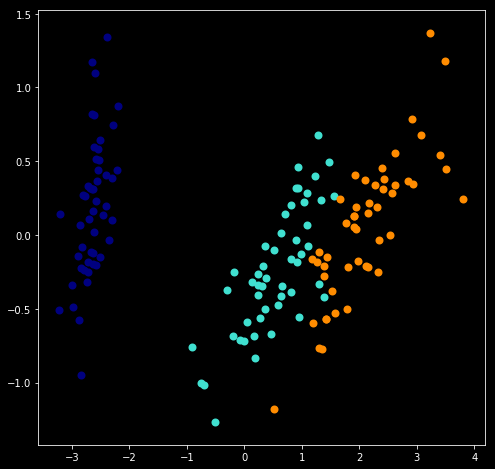

In [27]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, IncrementalPCA

iris = load_iris()
X = iris.data
y = iris.target

# 使用 Incremental PCA，将单次处理数据量设为 10
ipca = IncrementalPCA(n_components=2, batch_size=10)
X_ipca = ipca.fit_transform(X)

# PLOT部分
colors = ['navy', 'turquoise', 'darkorange']
plt.figure(figsize=(8, 8))
for color, i in zip(colors, [0,1,2]):
    plt.scatter(X_ipca[y==i,0], X_ipca[y==i,1], color=color, lw=2)
plt.show()

## Kernel PCA
[`KernelPCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA) in `sklearn`.

An extension of PCA which achieves non-linear dimensionality reduction through the use of kernels.

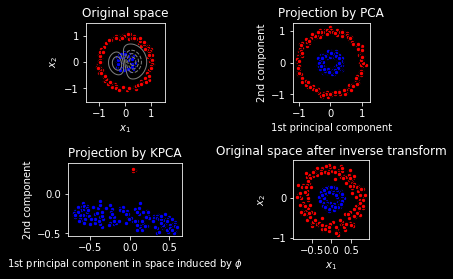

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

np.random.seed(0)

X, y = make_circles(n_samples=400, factor=.3, noise=.05)

kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA()
X_pca = pca.fit_transform(X)

# Plot results

plt.figure()
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Original space")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T
# projection on the first principal component (in the phi space)
Z_grid = kpca.transform(X_grid)[:, 0].reshape(X1.shape)
plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')

plt.subplot(2, 2, 2, aspect='equal')
plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")

plt.subplot(2, 2, 3, aspect='equal')
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by KPCA")
plt.xlabel(r"1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

plt.subplot(2, 2, 4, aspect='equal')
plt.scatter(X_back[reds, 0], X_back[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_back[blues, 0], X_back[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Original space after inverse transform")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.tight_layout()
plt.show()

## SparsePCA and MiniBatchSparsePCA


[`SparsePCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.SparsePCA.html#sklearn.decomposition.SparsePCA) is a variant of PCA, with the goal of extracting the set of sparse components that best reconstruct the data. It yields a more parsimonious, interpretable representation, clearly emphasizing which of the original features contribute to the differences between samples.

In [ ]:
import numpy as np
from sklearn.datasets import make_friedman1
from sklearn.decomposition import SparsePCA

X, _ = make_friedman1(n_samples=200, n_features=30, random_state=0)
transformer = SparsePCA(n_components=5,
                        normalize_components=True,
                        random_state=0)
transformer.fit(X) 

X_transformed = transformer.transform(X)
X_transformed.shape

# most values in the components_ are zero (sparsity)
np.mean(transformer.components_ == 0) 

# Truncated SVD and Latent Semantic Analysis

>即为仅计算前 $k$ 项的 SVD，与 PCA 相似，但直接作用于数据矩阵 $X$

[`TruncatedSVD`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html#sklearn.decomposition.TruncatedSVD) only computes the **$k$
largest** singular values, where $k$ is a user-specified parameter.

When it's applied to term-document matrices, this transformation is known as **latent semantic analysis (LSA)**, because it transforms such matrices to a "semantic" space of low dimensionality.

Using it on tf–idf matrices is recommended over raw frequency counts in an LSA/document processing setting.

## `TruncatedSVD` Class

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import sparse_random_matrix
X = sparse_random_matrix(100, 100, density=0.01, random_state=42)
svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
svd.fit(X)  

print(svd.explained_variance_ratio_)  

print(svd.explained_variance_ratio_.sum())  

print(svd.singular_values_)

# Dictionary Learning


## `SparseCoder`
[`SparseCoder`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.SparseCoder.html#sklearn.decomposition.SparseCoder) finds a sparse representation of data against a fixed, precomputed dictionary.
Each row of the result is the solution to a sparse coding problem. The goal is to find a sparse array `code` such that:
$$X \approx code \times dictionary$$


[Example](https://scikit-learn.org/stable/auto_examples/decomposition/plot_image_denoising.html#sphx-glr-auto-examples-decomposition-plot-image-denoising-py) of Dictionary Learning

# Factor Analysis

>假定存在一组线性变换，即为因子，所有数据都可以用将其作为一组基，被其线性表示

The observations are assumed to be caused by a linear transformation of lower dimensional latent factors and added Gaussian noise. It performs a maximum likelihood estimate of the loading matrix, the transformation of the latent variables to the observed ones, using expectation-maximization (EM).

## `FacotrAnalysis`

内置函数：
- `score()`：计算平均 log-likelihood 
- `score_samples()`

# Independent component analysis (ICA)

>主要用于盲源分离，将数据中的不同变量分离出来，并使分离出的变量尽可能互相独立

It separates a multivariate signal into additive subcomponents that are maximally independent. Typically, ICA is not used for reducing dimensionality but for separating superimposed signals.

## `FastICA`
[Here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html#sklearn.decomposition.FastICA)

In [ ]:
from sklearn.datasets import load_digits
from sklearn.decomposition import FastICA

X, _ = load_digits(return_X_y=True)
X_transformed = transformer.fit_transform(X)
X_transformed.shape

# Non-negative matrix factorization